In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv(r'C:\Users\Dell\Desktop\Datasets\Mall_Customers.csv')

In [3]:
ds.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
ds.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
ds.shape

(200, 5)

In [6]:
ds.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


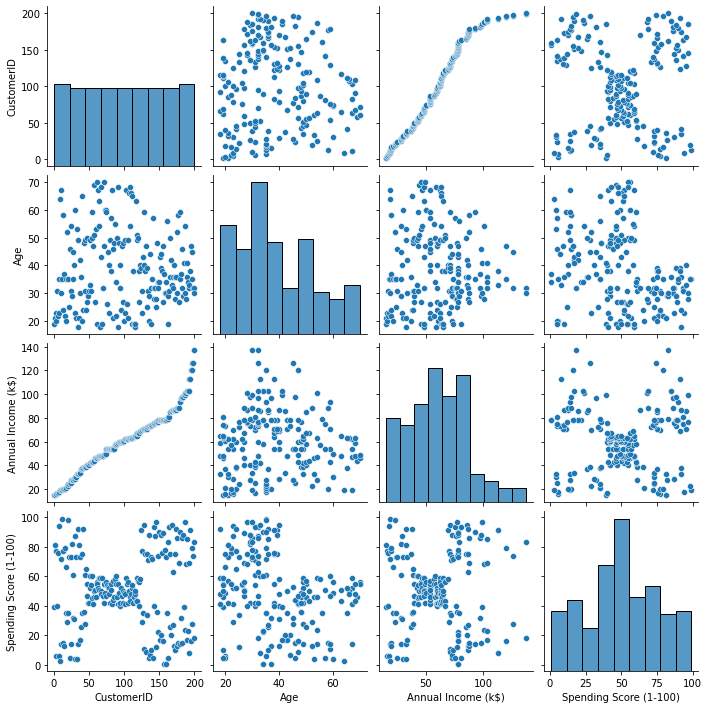

In [8]:
sns.pairplot(ds)

<AxesSubplot:>

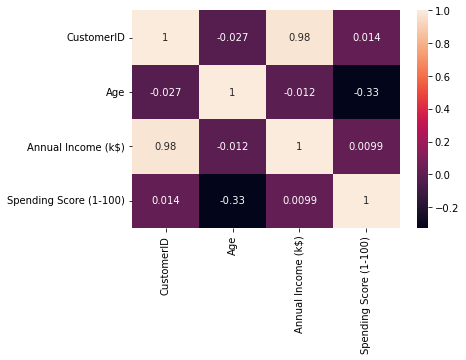

In [9]:
sns.heatmap(ds.corr(),annot=True)

In [10]:
ds['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

<AxesSubplot:xlabel='Genre', ylabel='Spending Score (1-100)'>

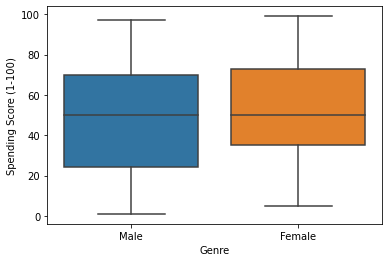

In [12]:
sns.boxplot(ds['Genre'],ds['Spending Score (1-100)'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='count'>

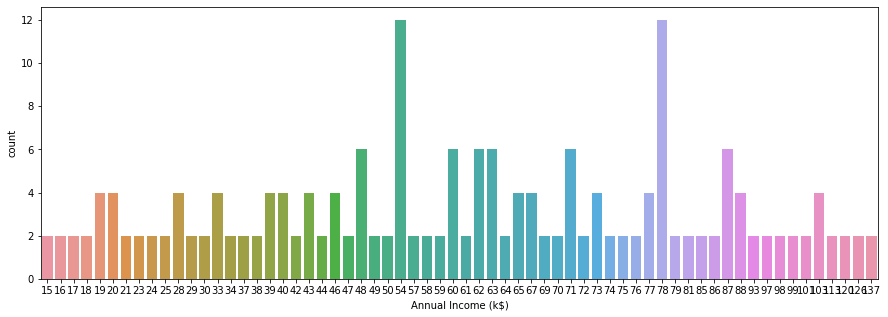

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(ds['Annual Income (k$)'])

In [14]:
ds.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)
ds.head()

,CustomerID,Genre,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
x = ds.loc[:, ['Annual_Income', 'Spending_Score']].values

# K Means

In [17]:
from sklearn.cluster import KMeans

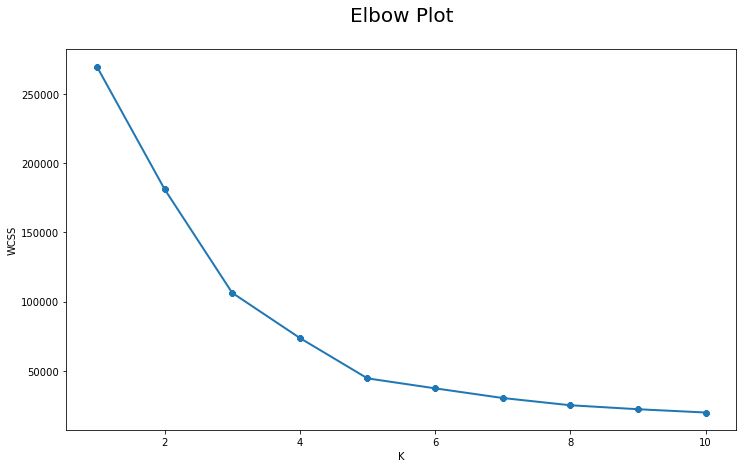

In [18]:
wcss= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

from the above the k value is 5

In [19]:
kmeans = KMeans(n_clusters = 5)
labels = kmeans.fit_predict(x)
print(labels)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [20]:
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


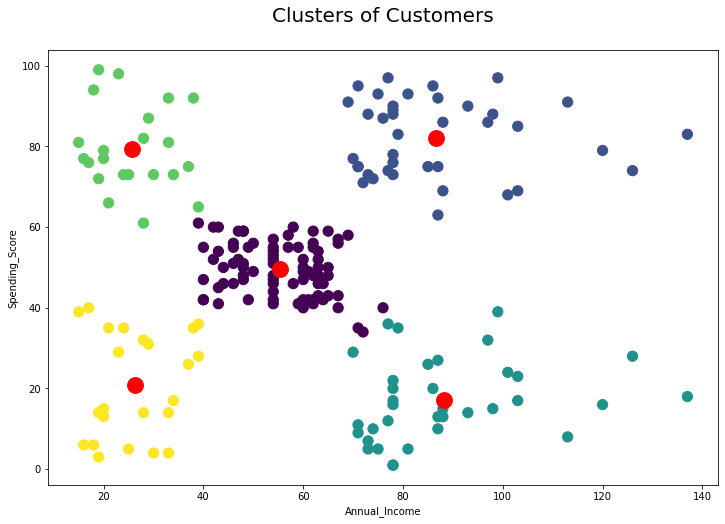

In [21]:
plt.figure(figsize = (12, 8))

plt.scatter(x[:, 0], x[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('Clusters of Customers\n', fontsize = 20)
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.show()

# HC

In [22]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

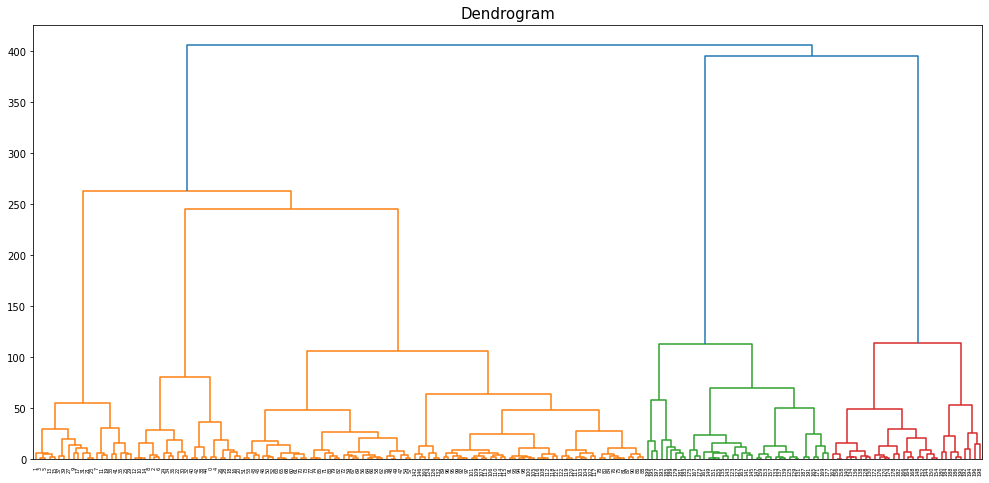

In [23]:
plt.figure(figsize = (17, 8))

dendo = dendrogram(linkage(x, method = 'ward'))
plt.title('Dendrogram', fontsize = 15)
plt.show()

In [24]:
agc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
labels = agc.fit_predict(x)

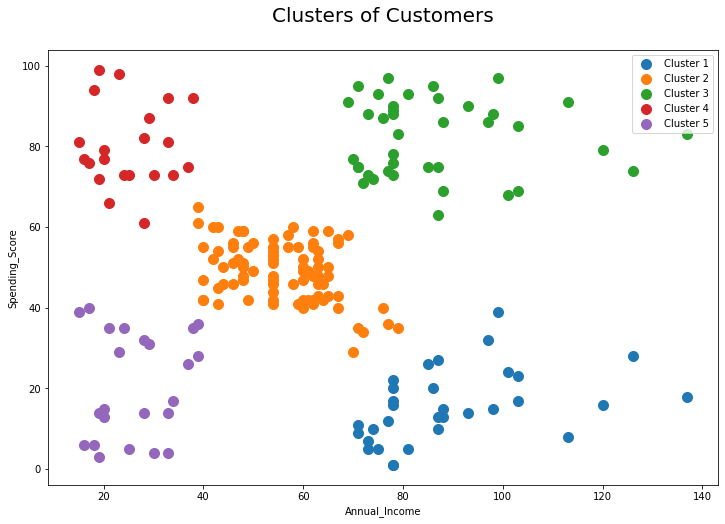

In [25]:
plt.figure(figsize = (12, 8))

plt.scatter(x[labels == 0,0], x[labels == 0,1], label = 'Cluster 1', s = 100)
plt.scatter(x[labels == 1,0], x[labels == 1,1], label = 'Cluster 2', s = 100)
plt.scatter(x[labels == 2,0], x[labels == 2,1], label = 'Cluster 3', s = 100)
plt.scatter(x[labels == 3,0], x[labels == 3,1], label = 'Cluster 4', s = 100)
plt.scatter(x[labels == 4,0], x[labels == 4,1], label = 'Cluster 5', s = 100)

plt.legend(loc = 'best')
plt.title('Clusters of Customers\n ', fontsize = 20)
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.show()

# DBSCAN

In [26]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
centers = [[1, 1], [-1, -1], [1, -1]]  
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, 
                            random_state=0)  # generate sample blobs

X = StandardScaler().fit_transform(X)

In [32]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)  
core_samples_mask[db.core_sample_indices_] = True  
labels = db.labels_ 

In [33]:
# the label -1 is considered as noise by the DBSCAN algorithm
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
n_noise_ = list(labels).count(-1)  # calculating the number of clusters

In [34]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953


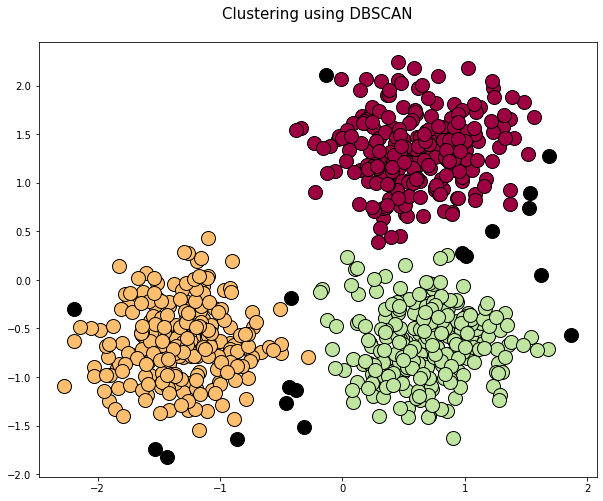

In [35]:
plt.figure(figsize = (10, 8))

unique_labels = set(labels)  
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]  

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)   
    xy = X[class_member_mask & core_samples_mask]   
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
    
plt.title('Clustering using DBSCAN\n', fontsize = 15)
plt.show()

# Mean Shift

In [36]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

In [37]:
centers = [[1, 1], [-1, -1], [1, -1]]
x, labels= make_blobs(n_samples=750, centers=centers, cluster_std=0.4)

In [38]:
bandwidth = estimate_bandwidth(x, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(x)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


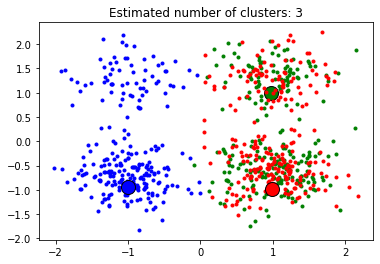

In [39]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(x[my_members, 0], X[my_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()


I have got different no of clusters based on differnt models

K means    : 5

Hc         : 5

DBSCAN     : 3

Meanshift  : 3

Here , DBSCAN and Meanshift has got equal no of cluters, But DBSCAN has formed better clustering than MEAN SHIFT.